In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from utils import get_best_threshold

In [4]:
wallets_features = pd.read_csv("../dataset/custom/wallets_features_aggregated.csv")
wallets_features.columns

Index(['class', 'num_timesteps_appeared_in', 'fees_median',
       'num_addr_transacted_multiple', 'addrId', 'userId',
       'user_ts_fees_share_mean', 'user_ts_fees_share_min',
       'user_ts_fees_share_max', 'user_addr_cnt', 'user_outcoming_tx_cnt',
       'user_incoming_tx_cnt', 'user_input_users_cnt', 'user_output_users_cnt',
       'user_active_time_steps_cnt', 'user_btc_sent_total',
       'user_btc_received_total', 'user_interracted_output_address_cnt',
       'user_interracted_input_address_cnt', 'user_overall_activity_coef',
       'user_whole_fee_5', 'addr_gini', 'whole_fees_5', 'num_txs_as_sender',
       'num_txs_as receiver', 'lifetime_in_blocks', 'total_txs',
       'btc_transacted_total', 'btc_sent_total', 'btc_received_total',
       'fees_total', 'transacted_w_address_total', 'first_block_appeared_in',
       'first_sent_block', 'first_received_block', 'btc_transacted_min',
       'btc_sent_min', 'btc_received_min', 'fees_min',
       'transacted_w_address_min', 'btc

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

from utils import (
    prepare_wallets_features_data,
    get_training_data
)

In [7]:
prep_data = prepare_wallets_features_data(wallets_features, type="raw")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False, binary=False)

column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier())
])

model = pipeline.fit(X_train, y_train)
y_pred_vals = model.predict(X_test)

print(f"Acc score: {accuracy_score(y_test, y_pred_vals)}")

KeyboardInterrupt: 

In [54]:
prep_data = prepare_wallets_features_data(wallets_features, type="raw")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False,)


    Best threshold: 0.3161578947368421
    Best F1: 0.7690501043841338, precicion: 0.8497693194925029, recall: 0.7023355576739753
    


{'thr': 0.3161578947368421,
 'precicion': 0.8497693194925029,
 'recall': 0.7023355576739753,
 'f1': 0.7690501043841338}

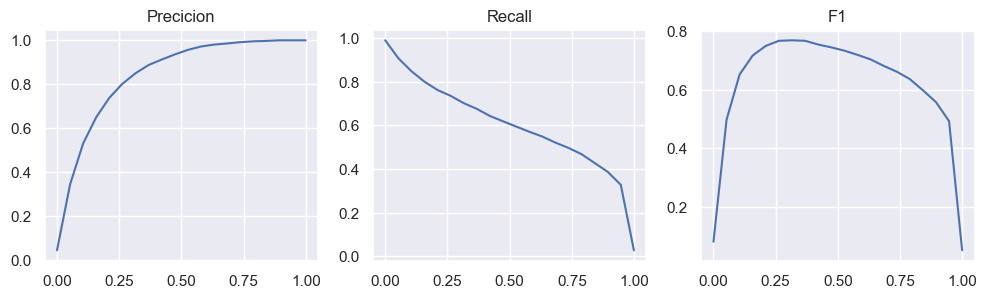

In [48]:
from utils import get_best_threshold

column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.3161578947368421
        Best F1: 0.8306669948314054, precicion: 0.8587786259541985, recall: 0.8043374642516683
        


{'thr': 0.3161578947368421,
 'precicion': 0.8587786259541985,
 'recall': 0.8043374642516683,
 'f1': 0.8306669948314054}

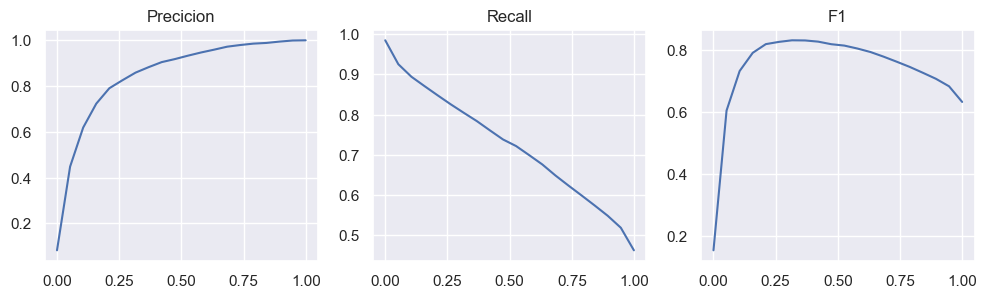

In [25]:
prep_data = prepare_wallets_features_data(wallets_features, type="with_users", )
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)


        Best threshold: 0.3161578947368421
        Best F1: 0.8303516347933375, precicion: 0.8608339728830903, recall: 0.801954242135367
        


{'thr': 0.3161578947368421,
 'precicion': 0.8608339728830903,
 'recall': 0.801954242135367,
 'f1': 0.8303516347933375}

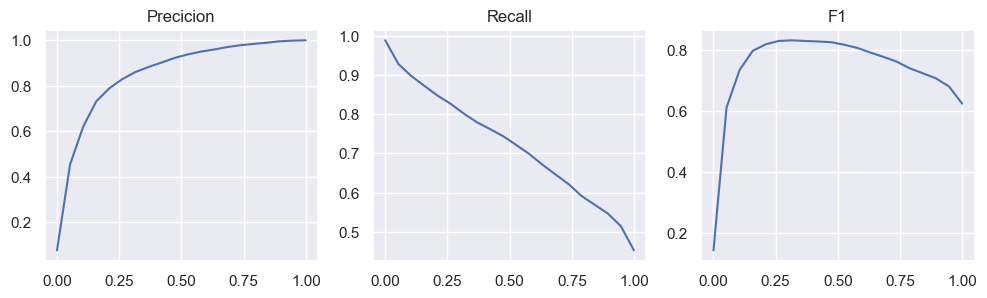

In [21]:
prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=150))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

# Оптимизация на всех параметрах

In [26]:
prep_data = prepare_wallets_features_data(wallets_features, type="full")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576059 entries, 546316 to 121958
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   num_timesteps_appeared_in            576059 non-null  float64
 1   num_addr_transacted_multiple         576059 non-null  float64
 2   num_txs_as_sender                    576059 non-null  float64
 3   num_txs_as receiver                  576059 non-null  float64
 4   lifetime_in_blocks                   576059 non-null  float64
 5   total_txs                            576059 non-null  float64
 6   btc_transacted_total                 576059 non-null  float64
 7   btc_sent_total                       576059 non-null  float64
 8   btc_received_total                   576059 non-null  float64
 9   fees_total                           576059 non-null  float64
 10  transacted_w_address_total           576059 non-null  float64
 11  first_block_a

In [ ]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 400)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    
    # Create a pipeline

    column_transformer = ColumnTransformer(
        transformers=[
            ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
        ]
    )

    pipeline = Pipeline(steps=[
        ('transformers', column_transformer),
        ('rf', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            n_jobs=5,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])
    model = pipeline.fit(X_train, y_train)

    model_results = get_best_threshold(model.predict_proba(X_val)[:,1], y_val, plot=False)
    # if model_results["f1"] is None or model_results["f1"] == np.nan:
    #     model_results["f1"] = 1000000
    return model_results["f1"]

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=10)

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best score:", study.best_value)

[I 2025-01-01 21:13:11,127] A new study created in memory with name: no-name-e47a11e1-725e-47fd-86a5-373271c625f3
[I 2025-01-01 21:14:17,095] Trial 8 finished with value: 0.7635206786850477 and parameters: {'n_estimators': 65, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.7635206786850477.
[I 2025-01-01 21:14:30,770] Trial 6 finished with value: 0.7515527950310561 and parameters: {'n_estimators': 84, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 8 with value: 0.7635206786850477.
[I 2025-01-01 21:14:38,080] Trial 3 finished with value: 0.4842043105993504 and parameters: {'n_estimators': 280, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 8 with value: 0.7635206786850477.
[I 2025-01-01 21:15:25,038] Trial 7 finished with value: 0.6415297603016429 and parameters: {'n_estimators': 212, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 8 with value: 0.


        Best threshold: 0.3161578947368421
        Best F1: 0.8091936312275295, precicion: 0.8772271714922049, recall: 0.7509532888465205
        


{'thr': 0.3161578947368421,
 'precicion': 0.8772271714922049,
 'recall': 0.7509532888465205,
 'f1': 0.8091936312275295}

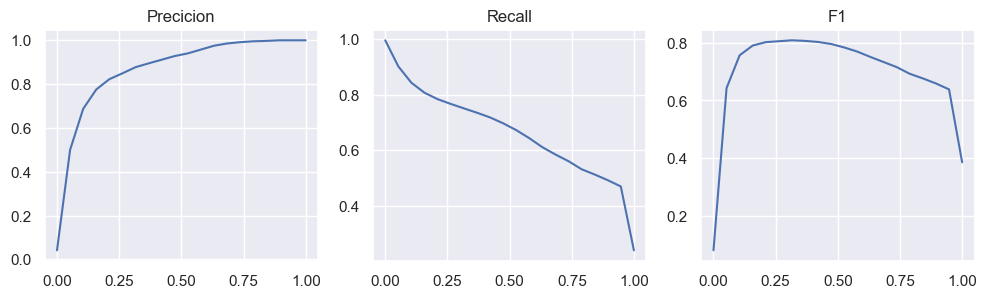

In [17]:
prep_data = prepare_wallets_features_data(wallets_features, type="full", )
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(**{'n_estimators': 137, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1}))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

# C доп флагами


        Best threshold: 0.3161578947368421
        Best F1: 0.8305713579025475, precicion: 0.8632390745501285, recall: 0.8002859866539561
        


{'thr': 0.3161578947368421,
 'precicion': 0.8632390745501285,
 'recall': 0.8002859866539561,
 'f1': 0.8305713579025475}

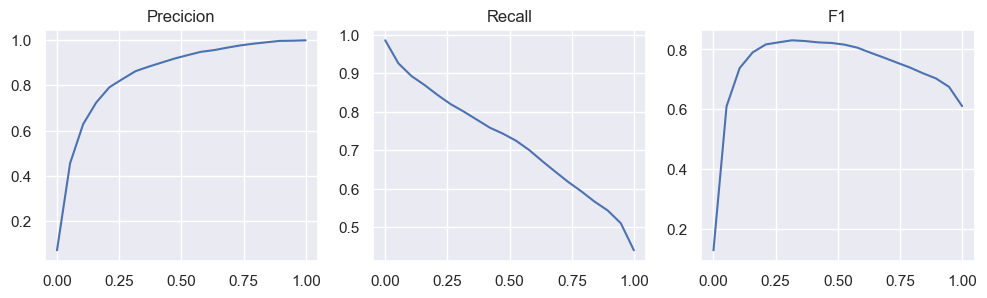

In [30]:
prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags", )
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=100))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [31]:
baseline = {'thr': 0.3161578947368421,
 'precicion': 0.8632390745501285,
 'recall': 0.8002859866539561,
 'f1': 0.8305713579025475}

# XGBOOST model


        Best threshold: 0.3161578947368421
        Best F1: 0.8049993623262339, precicion: 0.8658436213991769, recall: 0.7521448999046711
        


{'thr': 0.3161578947368421,
 'precicion': 0.8658436213991769,
 'recall': 0.7521448999046711,
 'f1': 0.8049993623262339}

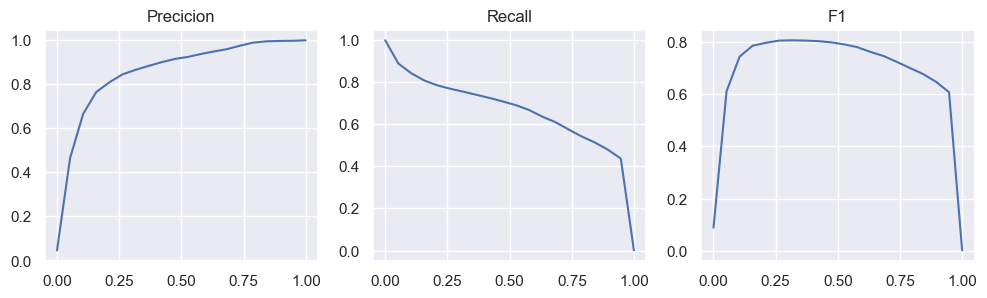

In [33]:
import xgboost as xgb 

prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

XGB - результаты лучше чем в статье (намного), но хуже чем RF

# Ensemble (RF + XGB)


        Best threshold: 0.15857894736842104
        Best F1: 0.8325489224671786, precicion: 0.8666838576585869, recall: 0.8010009532888466
        


{'thr': 0.15857894736842104,
 'precicion': 0.8666838576585869,
 'recall': 0.8010009532888466,
 'f1': 0.8325489224671786}

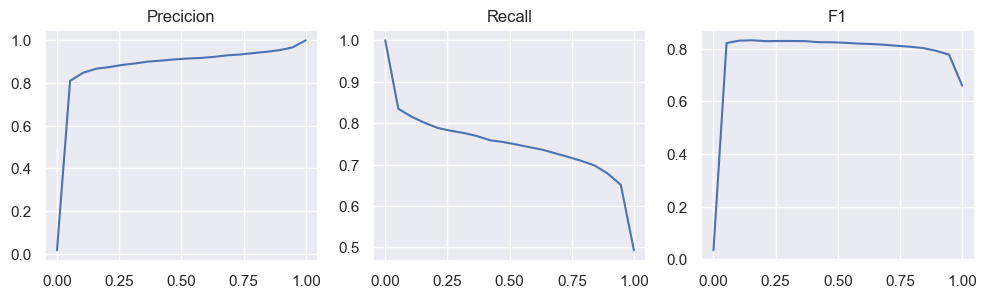

In [34]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

prep_data = prepare_wallets_features_data(wallets_features, type="full_with_extra_flags")
X_train, X_test, y_train, y_test = get_training_data(prep_data, no_unknown=False)


column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(prep_data.columns) - set(["addrId", "class"]))),
    ]
)

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('clf', stacking_clf)
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

get_best_threshold(y_pred, y_test)

In [46]:
results, thrs, prec_hist, rec_hist = get_best_threshold(y_pred, y_test, plot=False, return_hists=True, thrs_cnt=130)

In [47]:
np.vstack((thrs, prec_hist, rec_hist)).T

array([[0.001     , 0.0169959 , 1.        ],
       [0.00873643, 0.5798627 , 0.90586273],
       [0.01647287, 0.69908467, 0.87368923],
       [0.0242093 , 0.74912026, 0.86248808],
       [0.03194574, 0.77498918, 0.85367016],
       [0.03968217, 0.79204825, 0.84509056],
       [0.0474186 , 0.80448205, 0.83841754],
       [0.05515504, 0.81187659, 0.83412774],
       [0.06289147, 0.81893101, 0.82888465],
       [0.07062791, 0.82563125, 0.82602479],
       [0.07836434, 0.83229066, 0.82435653],
       [0.08610078, 0.83718104, 0.82102002],
       [0.09383721, 0.84170546, 0.8186368 ],
       [0.10157364, 0.84575518, 0.81673022],
       [0.10931008, 0.84923   , 0.81482364],
       [0.11704651, 0.85097354, 0.81244042],
       [0.12478295, 0.8545546 , 0.80934223],
       [0.13251938, 0.85750443, 0.80743565],
       [0.14025581, 0.86136595, 0.80552908],
       [0.14799225, 0.86310133, 0.80386082],
       [0.15572868, 0.86592898, 0.80195424],
       [0.16346512, 0.86692506, 0.79957102],
       [0.

In [35]:
baseline

{'thr': 0.3161578947368421,
 'precicion': 0.8632390745501285,
 'recall': 0.8002859866539561,
 'f1': 0.8305713579025475}